In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('desktop/body-sway-when-standing-and-listening-to-music-modified-to-reinforce-virtual-reality-environment-motion-1.0.0/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


desktop/body-sway-when-standing-and-listening-to-music-modified-to-reinforce-virtual-reality-environment-motion-1.0.0/S1\ECL1.csv
desktop/body-sway-when-standing-and-listening-to-music-modified-to-reinforce-virtual-reality-environment-motion-1.0.0/S1\ECL2.csv
desktop/body-sway-when-standing-and-listening-to-music-modified-to-reinforce-virtual-reality-environment-motion-1.0.0/S1\ECN.csv
desktop/body-sway-when-standing-and-listening-to-music-modified-to-reinforce-virtual-reality-environment-motion-1.0.0/S1\ECR.csv
desktop/body-sway-when-standing-and-listening-to-music-modified-to-reinforce-virtual-reality-environment-motion-1.0.0/S1\WL1.csv
desktop/body-sway-when-standing-and-listening-to-music-modified-to-reinforce-virtual-reality-environment-motion-1.0.0/S1\WL2.csv
desktop/body-sway-when-standing-and-listening-to-music-modified-to-reinforce-virtual-reality-environment-motion-1.0.0/S1\WN.csv
desktop/body-sway-when-standing-and-listening-to-music-modified-to-reinforce-virtual-reality-env

## 1. Выбор датасета
За основу взят датасет с результатами одного из испытуемых для опыта: с открытыми глазами смотрит на виртуальную среду, слушая немодифицированную версию «Юпитера» Моцарта. Время в секундах (Time), вертикальная сила (Fz), момент относительно медиально-латеральной оси (Mx), момент относительно переднезадней оси (My), расположение медиально-латерального центра давления (COPx) и расположение переднезаднего центра давления (COPy). Данные были собраны с частотой 1000 Гц с помощью весов, на которых в течение 60 секунд стоит испытуемый.

In [37]:
df = pd.read_csv('desktop/body-sway-when-standing-and-listening-to-music-modified-to-reinforce-virtual-reality-environment-motion-1.0.0/S9\WR.csv')
df

,Time,Fz,Mx,My,CoPx,CoPy
0,0.000,609.459337,9.47342,-4.045654,0.006638,0.015544
1,0.001,609.459337,9.47342,-4.045654,0.006638,0.015544
2,0.002,609.554557,9.49331,-4.068014,0.006674,0.015574
3,0.003,609.554557,9.49331,-4.068014,0.006674,0.015574
4,0.004,609.554557,9.49331,-4.068014,0.006674,0.015574
...,...,...,...,...,...,...
59991,59.991,609.660687,11.23047,-4.136084,0.006784,0.018421
59992,59.992,609.475597,11.26943,-4.135904,0.006786,0.018490
59993,59.993,609.475597,11.26943,-4.135904,0.006786,0.018490
59994,59.994,609.473247,11.22995,-4.135304,0.006785,0.018426


In [38]:
pd.options.mode.chained_assignment = None

# Уберём лишние строки
#df['Time'].astype('int')
#df = df.drop_duplicates(subset=['Time'], keep='first')

# Удалим ненужные столбцы.
for field in ('Fz', 'My', 'CoPx', 'CoPy'):
    if field in df:
        df.drop(field, axis=1, inplace=True)

df.sort_values('Time', inplace=True)

df = df.tail(700)

<AxesSubplot:title={'center':'Исходный сигнал'}, xlabel='Время, с', ylabel='Момент относительно медиально-латеральной оси'>

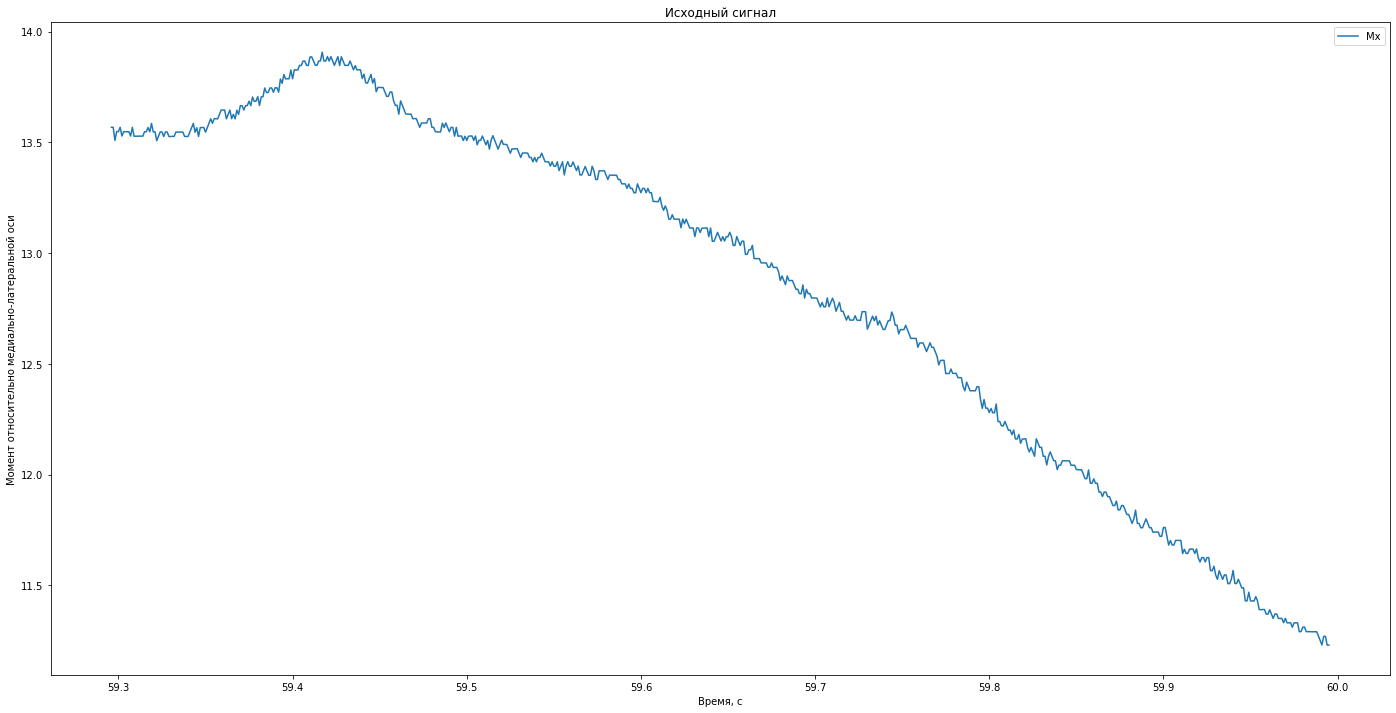

In [39]:
df.plot(
    title='Исходный сигнал',
    x='Time', 
    y='Mx',
    xlabel='Время, с',
    ylabel='Момент относительно медиально-латеральной оси',
    figsize=(24, 12)
)

## 2. Выполнение расчётов

In [41]:
import scipy.fft
import pywt
import pywt.data

from numpy import nanmax
from pandas import read_csv
from matplotlib import pyplot
from scipy.fftpack import fft

### 2.1 Математическое ожидание

In [42]:
from scipy import stats

mean = stats.describe(df['Mx']).mean
mean

12.851264742857142

### 2.2 Дисперсия

In [43]:
variance = stats.describe(df['Mx']).variance
variance

0.6345894347422799

### 2.3 Размах

In [44]:
min_, max_ = stats.describe(df['Mx']).minmax
range_ = abs(max_ - min_)
range_

2.67779

### 2.4 Автокорреляционная функция

Text(0.5, 1.0, 'Автокорреляционная функция')

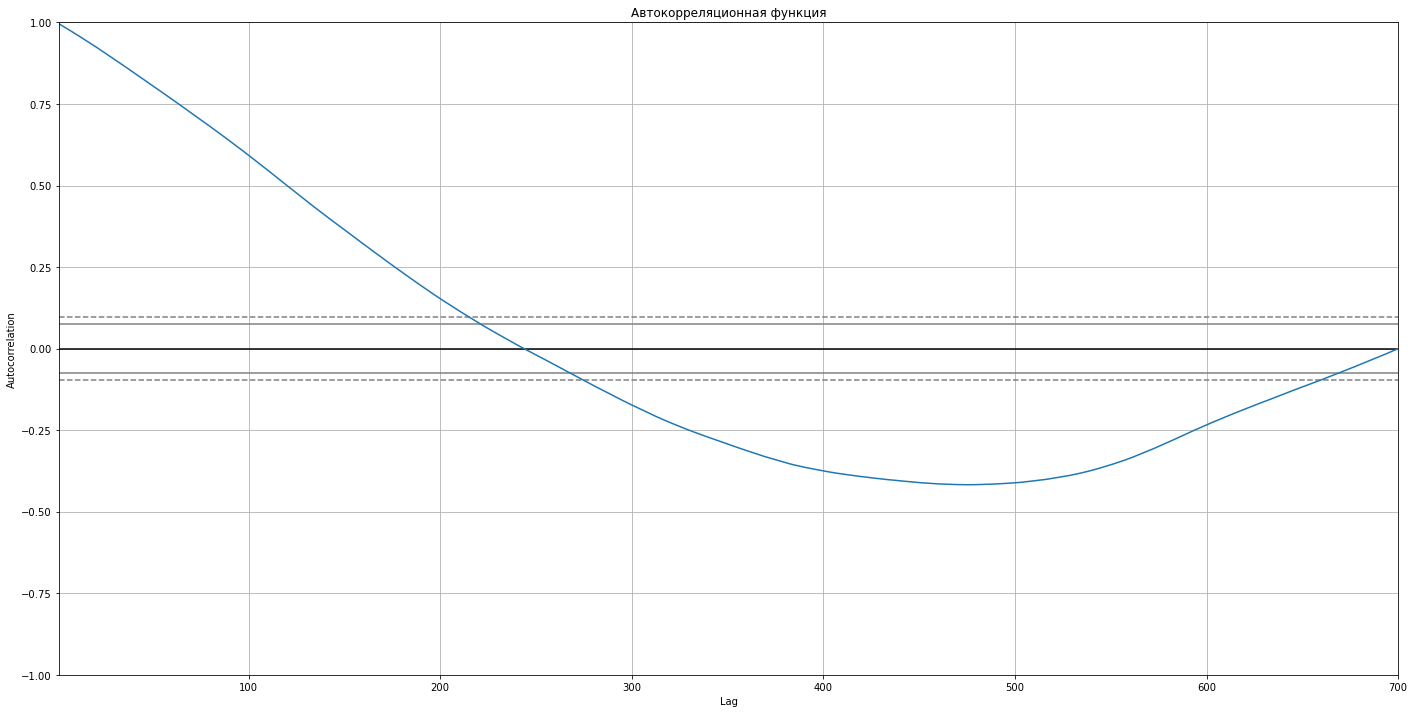

In [45]:
pyplot.figure(figsize=(24, 12))
pd.plotting.autocorrelation_plot(df['Mx'].values)
pyplot.title("Автокорреляционная функция")

### 2.5 Оконное преобразование Фурье

Text(0.5, 1.0, 'Оконное преобразование Фурье')

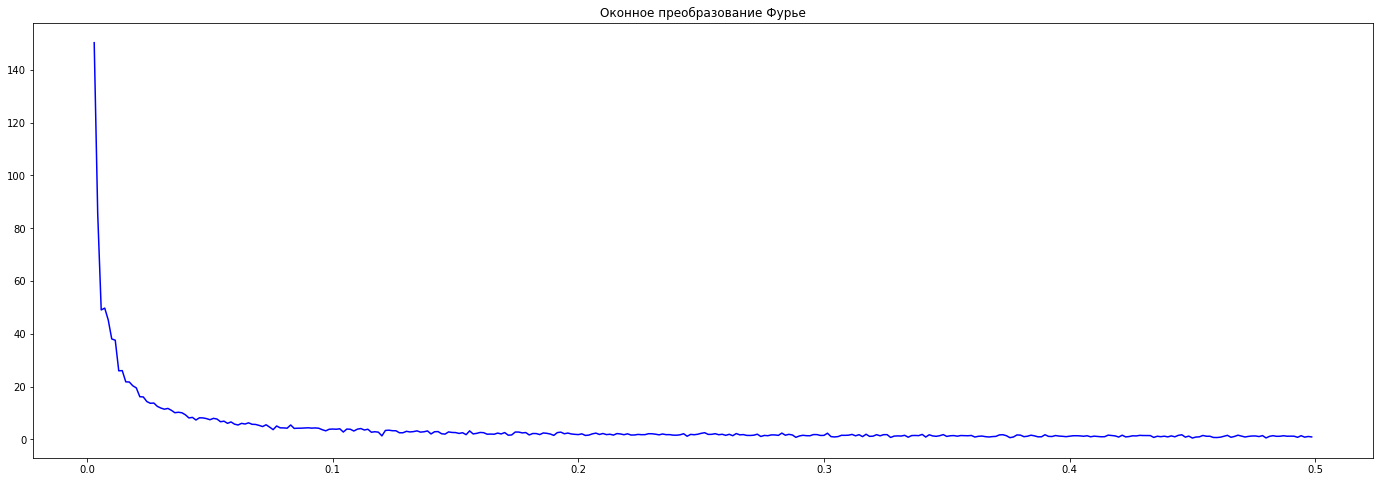

In [46]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

X = fft(df['Mx'].values)
N = len(X)
n = np.arange(N)
# get the sampling rate
sampling_rate = 1
T = N / sampling_rate
freq = n / T

n_oneside = N // 2
f_oneside = freq[:n_oneside]

pyplot.figure(figsize=(24, 8))
pyplot.plot(f_oneside[2:], np.abs(X[2:n_oneside]), 'b')
pyplot.title('Оконное преобразование Фурье')

### 2.6 Построение вейвлета Хаара

Text(0.5, 1.0, 'Вейвлет Хаара')

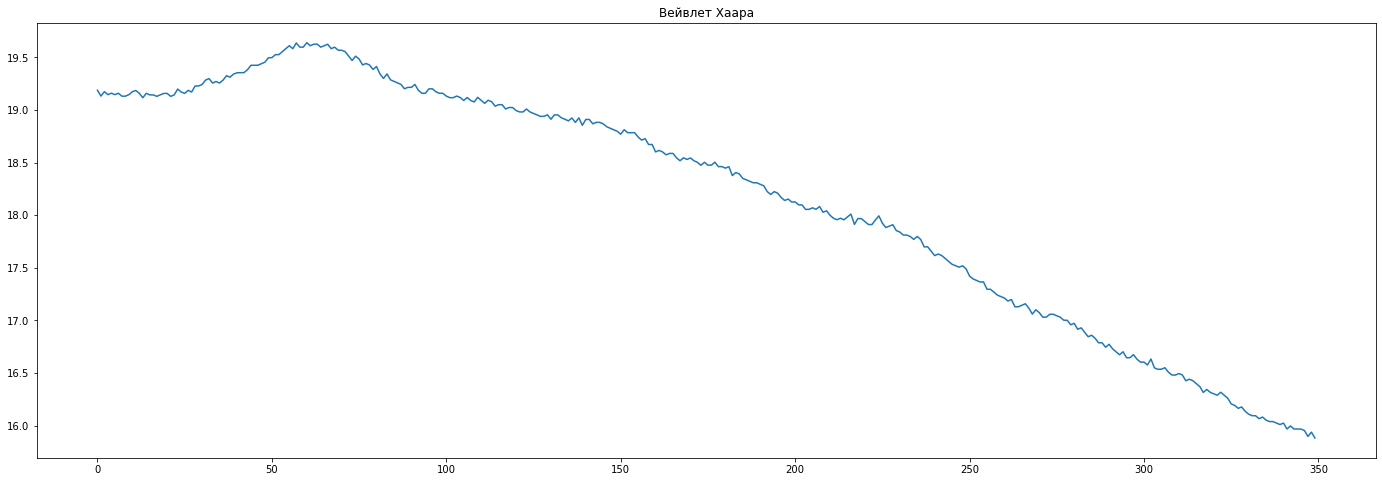

In [47]:
approx_coffs, _ = pywt.dwt(df['Mx'].values, wavelet='haar')
pyplot.figure(figsize=(24, 8))
pyplot.plot(approx_coffs)
pyplot.title("Вейвлет Хаара")

### 2.8 Пороговая фильтрация сигнала

Text(0.5, 1.0, 'Пороговая фильтрация сигнала')

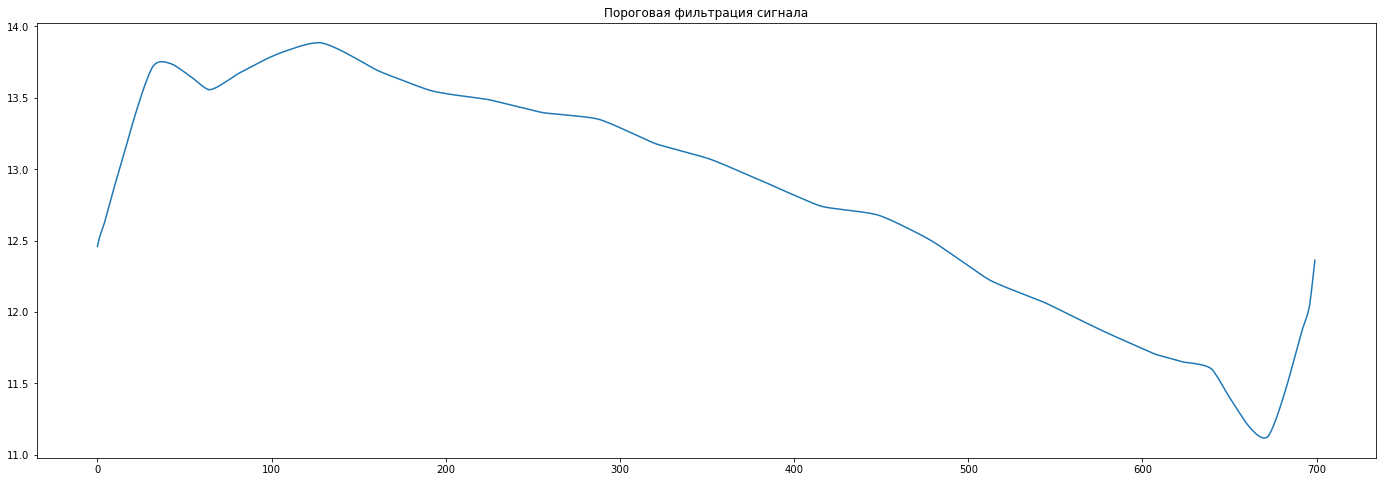

In [48]:
thresh = 0.612 * nanmax(df['Mx'].values)
coffs = pywt.wavedec(df['Mx'].values, 'bior4.4', level=5, mode='per')
coffs[1:] = (
    pywt.threshold(i, value=thresh, mode="soft")
    for i in coffs[1:]
)
reconstructed_signal = pywt.waverec(
    coffs, 
    'bior4.4', 
    mode='per'
)
pyplot.figure(figsize=(24, 8))
pyplot.plot(reconstructed_signal)
pyplot.title("Пороговая фильтрация сигнала")

### 2.9 Восстановление сигнала

Text(0.5, 1.0, 'Восстановленный сигнал')

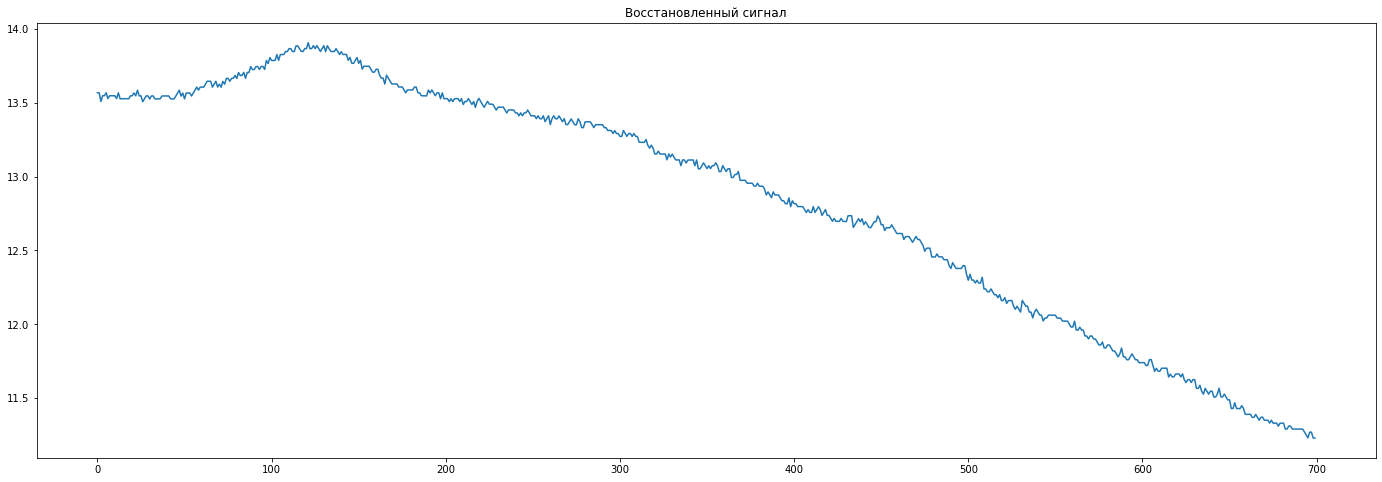

In [49]:
c_a, c_d = pywt.dwt(df, 'db2', 'smooth')
r_signal = pywt.idwt(c_a, c_d, 'db2', 'smooth')
    
r_df = pd.DataFrame(r_signal)
r_df.columns = ['dot', 'Dataset']

pyplot.figure(figsize=(24, 8))
pyplot.plot(r_df['Dataset'])
pyplot.title("Восстановленный сигнал")

In [50]:
print(
    'Стандартные отклонения исходного и восстановленного сигналов',
    df['Mx'].values.std(), 
    r_df['Dataset'].std(ddof=10),
)

Стандартные отклонения исходного и восстановленного сигналов 0.7960420079411223 0.8017896783065483
